# Invariant masses:

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import utils

cwd = os.getcwd()
#import mplhep as hep
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})
%load_ext autoreload
%autoreload 2

In [2]:
file_paths = [f"../proj/GamGam/Data/data_{x}.GamGam.root" for x in ['A', 'B', 'C', 'D']]  # Update with your file path
tree_name = "mini"  # The tree name based on the provided data structure
bw=3
lower, upper = 110, 140
#datasets = [file_paths[1]]
#bw=1.5
#lower, upper = 110, 140
datasets = file_paths

In [3]:
# Initialize lists to store results
invariant_masses = []
total_events = 0
tight_photons_count = 0
isolated_photons_count = 0
valid_jet_met_count = 0

# Loop through each dataset file
for file_path in datasets:
#for file_path in [datasets[1]]:
    with uproot.open(file_path) as file:
        tree = file[tree_name]

        # Read the branches for photon data
        photon_E = tree["photon_E"].array(library="np")
        photon_pt = tree["photon_pt"].array(library="np")
        photon_eta = tree["photon_eta"].array(library="np")
        photon_phi = tree["photon_phi"].array(library="np")
        photon_isTightID = tree["photon_isTightID"].array(library="np")
        photon_ptcone30 = tree["photon_ptcone30"].array(library="np")
        photon_etcone20 = tree["photon_etcone20"].array(library="np")
        jet_n = tree["jet_n"].array(library="np")
        met_et = tree["met_et"].array(library="np")

    # Total number of events
    total_events += len(photon_E)

    # Loop through each event to calculate the invariant mass and apply filters
    for E, pt, eta, phi, isTight, ptcone30, etcone20, jet_count, met in zip(
        photon_E, photon_pt, photon_eta, photon_phi, photon_isTightID, photon_ptcone30, photon_etcone20, jet_n, met_et):

        # Filter for events with at least two photons
        if len(E) >= 2 and isTight[0] and isTight[1]:  # Both photons must be "tight"
            tight_photons_count += 1  # Count events passing the tight filter

            # Apply photon isolation criteria
            if True:#ptcone30[0] < 5.0 and etcone20[0] < 5.0 :#and ptcone30[1] < 5.0 and etcone20[1] < 5.0:
                isolated_photons_count += 1  # Count events passing the isolation filter

                # Optional: filter for events with zero jets and low missing transverse energy
                if jet_count ==0 and met/1000 < 25:
                    valid_jet_met_count += 1  # Count events passing jet and MET filter

                    # Sort photons by energy if needed
                    sorted_indices = np.argsort(E)[::-1]
                    E = E[sorted_indices]
                    pt = pt[sorted_indices]
                    eta = eta[sorted_indices]
                    phi = phi[sorted_indices]

                    # Calculate px, py, pz from pt, eta, phi
                    px = pt * np.cos(phi)
                    py = pt * np.sin(phi)
                    pz = pt * np.sinh(eta)

                    # Calculate the invariant mass of the two leading photons
                    E1, E2 = E[0], E[1]
                    px1, px2 = px[0], px[1]
                    py1, py2 = py[0], py[1]
                    pz1, pz2 = pz[0], pz[1]

                    # Ensure energies are positive
                    if E1 > 0 and E2 > 0:
                        # Calculate the invariant mass
                        invariant_mass = np.sqrt((E1 + E2)**2 - (px1 + px2)**2 - (py1 + py2)**2 - (pz1 + pz2)**2)
                        invariant_mass /= 1000  # Convert to GeV

                        # Filter events within the mass window
                        if True:#lower <= invariant_mass <= upper:
                            invariant_masses.append(invariant_mass)


# P Value Computation

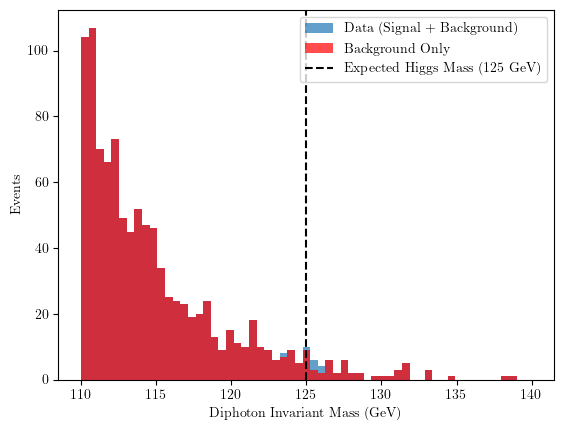

Observed test statistic q0: 3.89
p-value: 1.651e-01
Significance (Z-value): 0.97σ


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate example data
np.random.seed(42)
n_background = 1000
n_signal = 7
mass_range = (110, 140)
mass_bins = np.linspace(*mass_range, 60)

# Background model: exponential
background = np.random.exponential(scale=5, size=n_background) + mass_range[0]
background = background[(background >= mass_range[0]) & (background <= mass_range[1])]

# Signal model: Gaussian centered around 125 GeV
signal = np.random.normal(loc=125, scale=1, size=n_signal)
signal = signal[(signal >= mass_range[0]) & (signal <= mass_range[1])]

# Combine data
data = np.concatenate([background, signal])

# Plot data
plt.hist(data, bins=mass_bins, alpha=0.7, label='Data (Signal + Background)')
plt.hist(background, bins=mass_bins, alpha=0.7, label='Background Only', color='red')
plt.axvline(125, color='black', linestyle='--', label='Expected Higgs Mass (125 GeV)')
plt.xlabel('Diphoton Invariant Mass (GeV)')
plt.ylabel('Events')
plt.legend()
plt.show()

# Compute test statistic for the observed data (simplified example)
observed_signal_events = np.sum((data > 124) & (data < 126))
expected_background_events = np.sum((background > 124) & (background < 126))
q0_obs = -2 * np.log(norm.sf(observed_signal_events, loc=expected_background_events, scale=np.sqrt(expected_background_events)))

# Generate pseudo-experiments
pseudo_experiments = np.random.poisson(expected_background_events, size=10000)
q0_pseudo = -2 * np.log(norm.sf(pseudo_experiments, loc=expected_background_events, scale=np.sqrt(expected_background_events)))

# Compute p-value
p_value = np.mean(q0_pseudo >= q0_obs)
Z_value = norm.isf(p_value)

print(f"Observed test statistic q0: {q0_obs:.2f}")
print(f"p-value: {p_value:.3e}")
print(f"Significance (Z-value): {Z_value:.2f}σ")

In [5]:
import pickle as pkl
with open('xy.pkl', 'rb') as f:
    x,y = pkl.load(f)
x , y = np.array(x), np.array(y)

[ 1.04929744e+05 -3.41108057e-02  3.44540856e-05]


/tmp/ipykernel_17974/2511098900.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x + c*x**2)


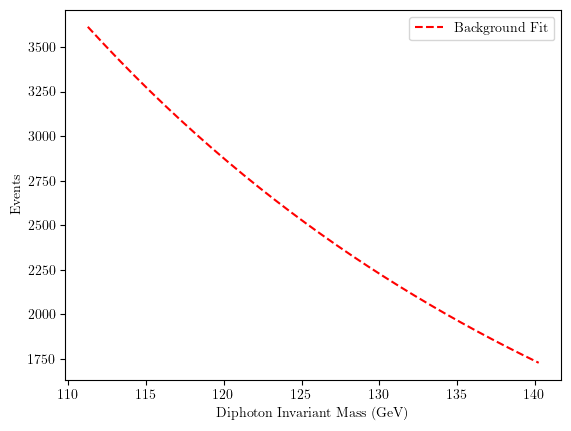

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Example data: List of invariant masses (in GeV)
#invariant_masses = np.array([
#    110.5, 112.3, 113.7, 115.2, 116.8, 117.5, 118.9, 120.1, 121.4, 122.5,
#    123.3, 124.7, 125.1, 125.6, 126.0, 126.4, 126.9, 127.2, 128.5, 129.0,
#    130.3, 131.5, 132.7, 133.9, 134.8, 135.6, 136.4, 137.5, 138.7, 139.9
#])

# Define a background model: Exponential decay
lower, upper = 110, 140
x = x
y = y
def background_model(x, a, b, c):
    return a * np.exp(b * x + c*x**2)

# Define a signal model: Gaussian peak
def signal_model(x, mu, sigma, amp):
    return np.abs(amp) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define a combined model: Signal + Background
def combined_model(x, a, b, c, mu, sigma, amp):
    return background_model(x, a, b, c) + signal_model(x, mu, sigma, amp)

# Bin the data to create a histogram
#bins = np.linspace(110, 140, 30)
#bin_centers = (bins[:-1] + bins[1:]) / 2
#hist, _ = np.histogram(invariant_masses, bins=bins)

# Fit the background-only model to data outside the signal region (sidebands)
x_outside = np.concatenate((x[110:124], x[126:140]))
y_outside = np.concatenate((y[110:124], y[126:140]))

popt_bg, pcov_bg = curve_fit(background_model, x[lower:upper], y[lower:upper], p0=(50000, -0.01, -0.001))
print(popt_bg)
# Plot the data and the fitted background model
#plt.hist(invariant_masses, bins=bins, alpha=0.7, label='Data', color='black')
plt.plot(x[110:140], background_model(x[110:140], *popt_bg), 'r--', label='Background Fit')
plt.xlabel('Diphoton Invariant Mass (GeV)')
plt.ylabel('Events')
plt.legend()
plt.show()



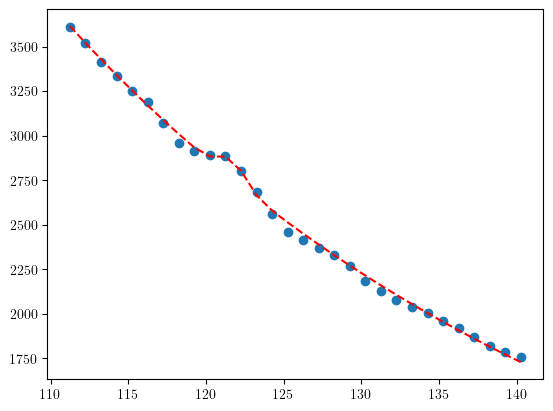

In [7]:
plt.plot(x[110:140], combined_model(x[110:140], 1.04929744*10**5, -3.41108057*10**(-2),  3.44540856*10**(-5), 121.69, 0.85, 111.78
), 'r--', label='Background Fit')
plt.scatter(x[110:140],y[110:140])

In [8]:

# Fit the combined model (signal + background) to all data
popt_combined, _ = curve_fit(combined_model, x[110:140], y[110:140], p0=[popt_bg[0], popt_bg[1], popt_bg[2], 121.69, 0.85, 111.78])
print(popt_combined)
# Compute the observed test statistic (log-likelihood ratio)
def log_likelihood(data, model, params):
    model_vals = model(x[110:140], *params)
    return np.sum(data * np.log(model_vals) - model_vals)

ll_bg = log_likelihood(y[110:140], background_model, popt_bg)
ll_combined = log_likelihood(y[110:140], combined_model, popt_combined)
q0_obs = -2 * (ll_bg - ll_combined)
print(f"Observed test statistic q0: {q0_obs:.2f}")


[ 3.97792119e+05 -5.57865628e-02  1.21822880e-04  1.21723782e+02
  1.16601662e+00  1.40494037e+02]
Observed test statistic q0: 10.74


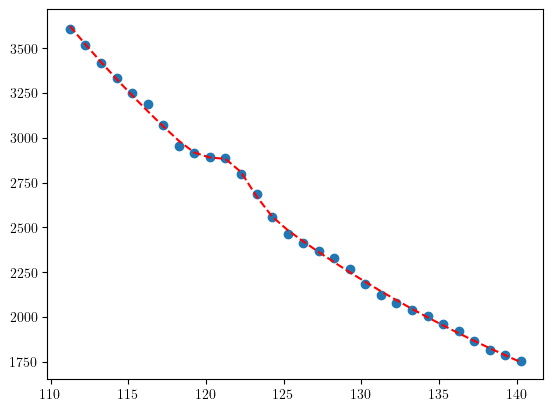

In [48]:
plt.plot(x[110:140], combined_model(x[110:140], *popt_combined), 'r--', label='Background Fit')
plt.scatter(x[110:140],y[110:140])

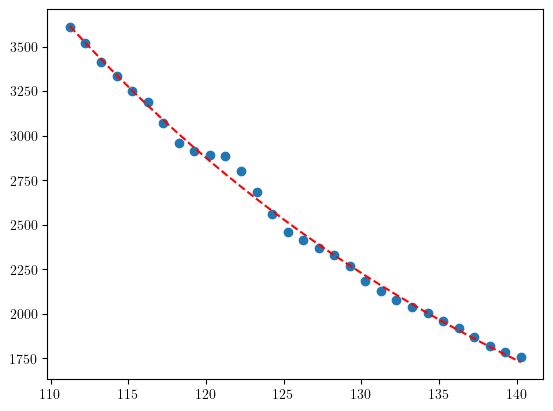

In [49]:
plt.plot(x[110:140], background_model(x[110:140], *popt_bg), 'r--', label='Background Fit')
plt.scatter(x[110:140],y[110:140])

In [10]:
from scipy.integrate import quad
normalization_factor, _ = quad(lambda x: background_model(x, popt_bg[0], popt_bg[1], popt_bg[2]), 110, 140)
normalization_factor

77935.42944477273

In [11]:
from scipy.stats import rv_continuous

# Custom random variable class using the normalized background function with popt
class BCKGRND(rv_continuous):
    def _pdf(self, x):
        """Normalized probability density function (PDF) for the background using popt."""
        # Check if x is within the valid range [110, 140]
        if np.any((x < 110) | (x > 140)):
            return 0.0
        # Compute normalized PDF
        return background_model(x, popt_bg[0], popt_bg[1], popt_bg[2]) / normalization_factor

# Create an instance of the custom background random variable
BG = BCKGRND(a=110, b=140, name='background')

# Generate samples from the normalized background distribution
samples = BG.rvs(size=10)
samples

array([132.8858148 , 117.8243916 , 111.91772274, 136.20545158,
       119.08522358, 118.06752886, 114.52396951, 135.64345458,
       114.83326682, 126.31896521])

In [12]:
BG.rvs(size=len(x[110:140]))

array([134.97819196, 110.73545903, 132.97046971, 119.70580169,
       127.00376999, 118.69176968, 128.24036957, 115.71513715,
       110.46029218, 137.72417694, 110.34300428, 132.79404796,
       113.70402703, 119.21452921, 132.73381062, 114.56000834,
       134.38614008, 122.12436076, 118.5283178 , 127.14877162,
       117.8875327 , 118.03920084, 129.53305766, 117.08611994,
       114.43881352, 132.1815237 , 132.09755877, 122.11940117,
       122.96061501, 128.25912404])

In [13]:
#plt.scatter(x[110:140], pseudo_data)
#plt.plot(x[110:140], background_model(x[110:140], *popt_pseudo),c='r')

In [14]:
q0_obs

10.738364239688963

In [15]:
from tqdm import tqdm


# Generate pseudo-experiments under the null hypothesis (background only)
n_pseudo = 100000
fails = 0
pseudo_q0 = []
for _ in tqdm(range(n_pseudo)):
    try:
        # Generate pseudo data under the background-only hypothesis
        #pseudo_data = np.random.poisson(background_model(x[110:140], *popt_bg))
        pseudo_data = BG.rvs(size=len(x[110:140]))
        pseudo_data = np.sort(pseudo_data)[::-1]
        
        # Fit the background model to the pseudo data
        popt_pseudo, _ = curve_fit(background_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2]])
        ll_pseudo_bg = log_likelihood(pseudo_data, background_model, popt_pseudo)
        
        # Fit the combined model to the pseudo data
        #popt_combined_pseudo, _ = curve_fit(combined_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2], 125, 1, 10])
        popt_combined_pseudo, _ = curve_fit(combined_model, 
                                            x[110:140], pseudo_data, p0=popt_combined, 
                                            bounds=np.array([[10**4,10**7],[-0.1,0.1],[-0.1,0.1],
                                                            [120,130],[0,np.inf],[0,500]]).T
                                            )
        ll_pseudo_combined = log_likelihood(pseudo_data, combined_model, popt_combined_pseudo)
        
        # Calculate the test statistic for the pseudo data
        q0_pseudo = -2 * (ll_pseudo_bg - ll_pseudo_combined)
        pseudo_q0.append(q0_pseudo)

        #fig = plt.figure()
        #plt.scatter(x[110:140], pseudo_data)
        #plt.plot(x[110:140], background_model(x[110:140], *popt_pseudo),c='r')
        #plt.plot(x[110:140], combined_model(x[110:140], *popt_combined_pseudo),c='r')
        #plt.show()
    except:
        fails+=1
        pass

# Compute p-value as the fraction of pseudo-experiments with q0 >= q0_obs
p_value = np.mean(np.array(pseudo_q0) >= q0_obs)
Z_value = norm.isf(p_value)
print(f'fails: {fails}')
print(f"p-value: {p_value:.3e}")
print(f"Significance (Z-value): {Z_value:.2f}σ")


  0%|          | 0/100000 [00:00<?, ?it/s]

 28%|██▊       | 27714/100000 [24:22<53:32, 22.50it/s]  /tmp/ipykernel_17974/3140645081.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_pseudo, _ = curve_fit(background_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2]])
100%|██████████| 100000/100000 [1:23:09<00:00, 20.04it/s]

fails: 1807
p-value: 1.018e-05
Significance (Z-value): 4.26σ


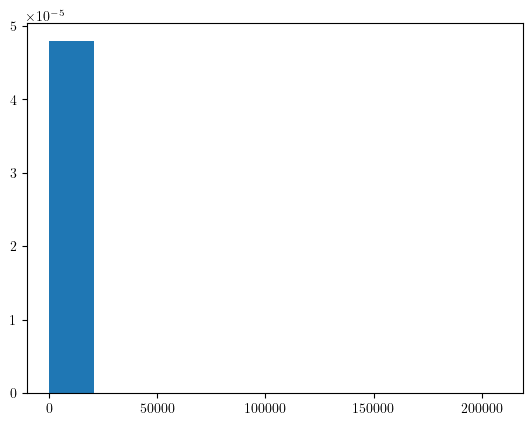

In [16]:
plt.figure()
plt.hist(pseudo_q0,density=True)
plt.show()

In [20]:
from tqdm import tqdm


# Generate pseudo-experiments under the null hypothesis (background only)
n_pseudo = 200000
fails = 0
pseudo_q0 = []
for _ in tqdm(range(n_pseudo)):
    try:
        # Generate pseudo data under the background-only hypothesis
        #pseudo_data = np.random.poisson(background_model(x[110:140], *popt_bg))
        pseudo_data = BG.rvs(size=len(x[110:140]))
        pseudo_data = np.sort(pseudo_data)[::-1]
        
        # Fit the background model to the pseudo data
        popt_pseudo, _ = curve_fit(background_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2]])
        ll_pseudo_bg = log_likelihood(pseudo_data, background_model, popt_pseudo)
        
        # Fit the combined model to the pseudo data
        #popt_combined_pseudo, _ = curve_fit(combined_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2], 125, 1, 10])
        popt_combined_pseudo, _ = curve_fit(combined_model, 
                                            x[110:140], pseudo_data, p0=popt_combined, 
                                            bounds=np.array([[-np.inf,np.inf],[-np.inf,np.inf],[-np.inf,np.inf],
                                                            [120,130],[0,np.inf],[0,np.inf]]).T
                                            )
        ll_pseudo_combined = log_likelihood(pseudo_data, combined_model, popt_combined_pseudo)
        
        # Calculate the test statistic for the pseudo data
        q0_pseudo = -2 * (ll_pseudo_bg - ll_pseudo_combined)
        pseudo_q0.append(q0_pseudo)

        #fig = plt.figure()
        #plt.scatter(x[110:140], pseudo_data)
        #plt.plot(x[110:140], background_model(x[110:140], *popt_pseudo),c='r')
        #plt.plot(x[110:140], combined_model(x[110:140], *popt_combined_pseudo),c='r')
        #plt.show()
    except:
        fails+=1
        pass

# Compute p-value as the fraction of pseudo-experiments with q0 >= q0_obs
p_value = np.mean(np.array(pseudo_q0) >= q0_obs)
Z_value = norm.isf(p_value)
print(f'fails: {fails}')
print(f"p-value: {p_value:.3e}")
print(f"Significance (Z-value): {Z_value:.2f}σ")


 26%|██▋       | 52530/200000 [1:20:56<4:28:57,  9.14it/s]/tmp/ipykernel_17974/3823800495.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_pseudo, _ = curve_fit(background_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2]])
100%|██████████| 200000/200000 [4:44:14<00:00, 11.73it/s]  

fails: 43332
p-value: 0.000e+00
Significance (Z-value): infσ


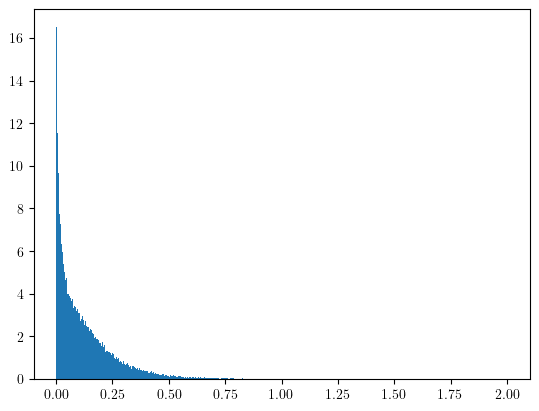

In [21]:
plt.figure()
plt.hist(pseudo_q0,density=True,bins=1000,range=[0,2])
plt.show()

In [22]:
from tqdm import tqdm


# Generate pseudo-experiments under the null hypothesis (background only)
n_pseudo = 400000
fails = 0
pseudo_q0_cut = []
for _ in tqdm(range(n_pseudo)):
    try:
        # Generate pseudo data under the background-only hypothesis
        #pseudo_data = np.random.poisson(background_model(x[110:140], *popt_bg))
        pseudo_data = BG.rvs(size=len(x[110:140]))
        pseudo_data = np.sort(pseudo_data)[::-1]
        
        # Fit the background model to the pseudo data
        popt_pseudo, _ = curve_fit(background_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2]])
        ll_pseudo_bg = log_likelihood(pseudo_data, background_model, popt_pseudo)
        
        # Fit the combined model to the pseudo data
        #popt_combined_pseudo, _ = curve_fit(combined_model, x[110:140], pseudo_data, p0=[popt_bg[0], popt_bg[1], popt_bg[2], 125, 1, 10])
        popt_combined_pseudo, _ = curve_fit(combined_model, 
                                            x[110:140], pseudo_data, p0=popt_combined, 
                                            bounds=np.array([[10**4,10**7],[-0.1,0.1],[-0.1,0.1],
                                                            [120,130],[0,np.inf],[0,500]]).T
                                            )
        ll_pseudo_combined = log_likelihood(pseudo_data, combined_model, popt_combined_pseudo)
        
        # Calculate the test statistic for the pseudo data
        q0_pseudo = -2 * (ll_pseudo_bg - ll_pseudo_combined)
        pseudo_q0.append(q0_pseudo)

        #fig = plt.figure()
        #plt.scatter(x[110:140], pseudo_data)
        #plt.plot(x[110:140], background_model(x[110:140], *popt_pseudo),c='r')
        #plt.plot(x[110:140], combined_model(x[110:140], *popt_combined_pseudo),c='r')
        #plt.show()
    except:
        fails+=1
        pass

# Compute p-value as the fraction of pseudo-experiments with q0 >= q0_obs
p_value = np.mean(np.array(pseudo_q0_cut) >= q0_obs)
Z_value = norm.isf(p_value)
print(f'fails: {fails}')
print(f"p-value: {p_value:.6e}")
print(f"Significance (Z-value): {Z_value:.2f}σ")


100%|██████████| 400000/400000 [5:13:03<00:00, 21.30it/s]  

fails: 7057
p-value: nan
Significance (Z-value): nanσ



/home/erik/miniconda3/envs/climx_attr/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/erik/miniconda3/envs/climx_attr/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
# Compute p-value as the fraction of pseudo-experiments with q0 >= q0_obs
p_value = np.mean(np.array(pseudo_q0[200000:]) >= q0_obs)
Z_value = norm.isf(p_value)
print(f'fails: {fails}')
print(f"p-value: {p_value:.6e}")
print(f"Significance (Z-value): {Z_value:.2f}σ")

fails: 7057
p-value: 0.000000e+00
Significance (Z-value): infσ


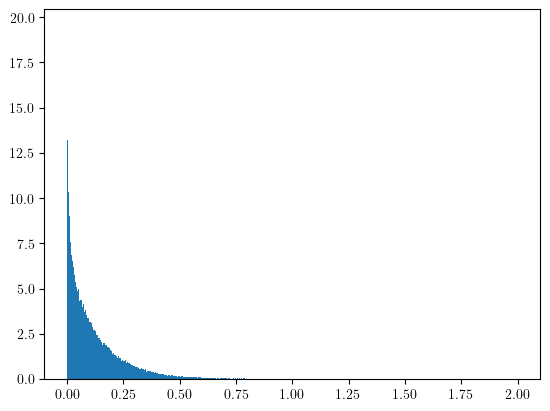

In [27]:
plt.figure()
plt.hist(pseudo_q0[200000:],density=True,bins=1000,range=[0,2])
plt.show()

# quick n dirty

In [32]:
np.sum(np.bitwise_and(np.array(invariant_masses) > 124, np.array(invariant_masses) < 126))

1986

In [36]:
np.sum(np.bitwise_and(np.array(invariant_masses) > 110, np.array(invariant_masses) < 140))/15

2075.0

In [38]:
background_model(120, *popt_bg)

2875.231444704045

In [40]:
import scipy.integrate as integrate
integrate.quad(lambda x: background_model(x, *popt_bg),124,126)

(5058.4110681659, 5.615964435896515e-11)

In [50]:
integral, error = integrate.quad(background_model, 120, 124, args=(popt_bg[0],popt_bg[1],popt_bg[2]))

In [51]:
integral

10928.434712803839

In [52]:
integralc, error = integrate.quad(combined_model, 120, 124, args=(popt_combined[0],popt_combined[1],popt_combined[2],popt_combined[3],popt_combined[4],popt_combined[5]))

In [54]:
(integralc-integral)/np.sqrt(integral)

2.3820425794256748

In [55]:
from scipy.stats import poisson, norm

p_value_gaussian = 1 - norm.cdf((integralc-integral)/np.sqrt(integral))
Z_value = norm.isf(p_value_gaussian)
p_value_gaussian,Z_value

(0.008608453295495977, 2.382042579425676)